# Land Price Prediction

# Imports:

In [ ]:
from osgeo import gdal
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import os
import time

In [ ]:
# For warning removal
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Data:

In [ ]:
# Give system path to file
# Folder Path
path = "NeighbourhoodPrices_06-16/"
  
# Change the directory

os.chdir(path)

In [ ]:
files = []

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".shp"):
        file_path = f"{file}"
  
        # call read text file function
        files.append(gpd.read_file(file_path))

In [ ]:
np.shape(files)

(10, 3324, 8)

### Addressing the problem relating to data for year 2010:

The data is not available for the year 2010. The data can be made by averaging the values for the year 2009 and 2011 for that particular grid.

$$Value_{2010} = \frac{Value_{2009}+Value_{2011}}{2}$$

In [ ]:
# To get the dataframe values for each land type:

df2009 = pd.DataFrame(files[3].drop(columns='geometry'))
df2011 = pd.DataFrame(files[4].drop(columns='geometry'))

In [ ]:
df2010 = df2009[{'Join_Count','TARGET_FID'}]

In [ ]:
# Applying the above equation to compute values for each land type:

df2010['OPEN_LAND'] = (df2011['OPEN_LAND']+ df2009['OPEN_LAND'])/2
df2010['RESIDENTIA'] = (df2011['RESIDENTIA']+ df2009['RESIDENTIA'])/2
df2010['COMMERCIAL'] = (df2011['COMMERCIAL']+ df2009['COMMERCIAL'])/2
df2010['COMMERC_01'] = (df2011['COMMERC_01']+ df2009['COMMERC_01'])/2
df2010['INDUSTRIAL'] = (df2011['INDUSTRIAL']+ df2009['INDUSTRIAL'])/2

C:\Users\MCPR9\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MCPR9\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\MCPR9\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [ ]:
# Integrating the data with geometry and forming Geo-Panda dataframe:
gdf2010 = gpd.GeoDataFrame(df2010, geometry = files[3].geometry)

In [ ]:
# The generated dataframe: 
gdf2010

,TARGET_FID,Join_Count,OPEN_LAND,RESIDENTIA,COMMERCIAL,COMMERC_01,INDUSTRIAL,geometry
0,0,3,41225.0,91466.666667,114091.666667,139025.0,91466.666667,"POLYGON ((275157.698 2103658.874, 274957.698 2..."
1,1,2,11125.0,28575.000000,34875.000000,42825.0,28575.000000,"POLYGON ((279657.698 2117342.075, 279457.698 2..."
2,2,1,19900.0,44250.000000,58650.000000,73050.0,45500.000000,"POLYGON ((275157.698 2131025.276, 274957.698 2..."
3,3,5,29450.0,57220.000000,75620.000000,98260.0,57220.000000,"POLYGON ((276057.698 2126002.329, 275857.698 2..."
4,4,3,37950.0,68700.000000,88600.000000,104800.0,68700.000000,"POLYGON ((272457.698 2119420.536, 272257.698 2..."
...,...,...,...,...,...,...,...,...
3319,3319,1,19900.0,44250.000000,58650.000000,73050.0,45500.000000,"POLYGON ((275457.698 2131544.892, 275257.698 2..."
3320,3320,2,20050.0,44525.000000,57175.000000,73975.0,45150.000000,"POLYGON ((274857.698 2131544.892, 274657.698 2..."
3321,3321,1,19900.0,44250.000000,58650.000000,73050.0,45500.000000,"POLYGON ((275157.698 2131371.687, 274957.698 2..."
3322,3322,1,19900.0,44250.000000,58650.000000,73050.0,45500.000000,"POLYGON ((275757.698 2131371.687, 275557.698 2..."


In [ ]:
# Inserting the dataframe to the list of each year data:
files.insert(4,gdf2010)

In [ ]:
#Final shape of our data
np.shape(files)

(11, 3324, 8)

### Visualization:

In [ ]:
import matplotlib.cm as cm
def plot_interact(t):   #For plotting at a particular time
    
    
    
    axes = fig, ((ax1, ax2, ax3), (ax4, ax5 , ax6)) = plt.subplots(nrows = 2, ncols = 3,figsize = (20,20), sharex = True, sharey = True)
    axlist = [ax1,ax2,ax3,ax4,ax5,ax6]
    
    vmin, vmax = 0, 1000000
    
    #ax = gdf.plot(column='val', colormap='hot', vmin=vmin, vmax=vmax)
    t = int(t) - 2006
    
    files[t].plot(ax = ax1, column = 'OPEN_LAND',cmap='BuPu', legend_kwds={'label':"Price Open Land"})
    files[t].plot(ax = ax2, column = 'RESIDENTIA', cmap='BuPu', legend_kwds={'label':"Price Residential Land"})
    files[t].plot(ax = ax3, column = 'COMMERCIAL', cmap='BuPu',  legend_kwds={'label':"Price Commercial Land"})
    files[t].plot(ax = ax4, column = 'COMMERC_01', cmap='BuPu', legend_kwds={'label':"Price Commercial_01 Land"})
    files[t].plot(ax = ax5, column = 'INDUSTRIAL', cmap='BuPu',legend_kwds={'label':"Price Industrial Land"})
    
    ax1.title.set_text("Price Open Land")
    ax2.title.set_text("Price Residential Land")
    ax3.title.set_text("Price Commercial Land")
    ax4.title.set_text("Price Commercial_01 Land")
    ax5.title.set_text("Price Industrial Land")
    
    fig.delaxes(ax6)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    ax5.axis('off')
    
    im = plt.gca().get_children()[0]
    cmap = plt.cm.viridis
    
    bounds = [0, 2500, 5000, 7500, 10000]
    #fig.colorbar(im, orientation='horizontal')
    fig.colorbar(im, ax=axlist)
    plt.rcParams['legend.title_fontsize'] = 'Large'


In [ ]:
# For interactive plot:
from ipywidgets import interact, widgets
interact(plot_interact, t = widgets.FloatSlider(min = 2006, max = 2016, step = 1, value = 2010))

interactive(children=(FloatSlider(value=2010.0, description='t', max=2016.0, min=2006.0, step=1.0), Output()),…

<function __main__.plot_interact(t)>

### Amenities data:

In [ ]:
sns.set(color_codes=True)
## Importing aminities:
df_amenities = pd.read_csv('NeighbourhoodGrid-AmenitiesCount.csv')

In [ ]:
df_amenities.drop(df_amenities.tail(1).index,inplace=True) 
df_amenities['TARGET_FID'] = df_amenities['TARGET_FID'].astype(int)-1

In [ ]:
df_amenities

,TARGET_FID,FacilityID,Count_Airport,Count_AmusementPark,Count_Aquarium,Count_ArtGallery,Count_ATM,Count_AutoTaxiStand,Count_Bakery,Count_Bank,...,Count_Stadium,Count_Store,Count_SubwayStation,Count_Supermarket,Count_synagogue,Count_TrainStation,Count_University,Count_veterinaryCare,Count_Zoo,Total Count
0,0,8000.0,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,0,0,0,65.0
1,1,8001.0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,16.0
2,2,8002.0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,19.0
3,3,8003.0,0,0,0,0,1,0,1,1,...,0,18,0,0,0,0,0,0,0,101.0
4,4,8004.0,0,0,1,0,1,0,2,0,...,0,123,0,2,0,0,0,0,0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,3319,11319.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3320,3320,11320.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
3321,3321,11321.0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,10.0
3322,3322,11322.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


# Data Processing:

In [ ]:
Property_type = ['OPEN_LAND','RESIDENTIA','COMMERCIAL','COMMERC_01','INDUSTRIAL']

In [ ]:
# Function takes name of propert type as a input to give the dataframe
# for a particular property type:

def datamaker(Ptype):
    data=[]
    df_price = pd.DataFrame(data)
    df_price['TARGET_FID'] = df_amenities['TARGET_FID']
    count = 0
    for i in files:
        year = 2006 + count
        df_price[str(year)] = i[Ptype]
        count += 1
    
    return df_price

In [ ]:
P_t_p = [] # List for property price data separated with property type
for i in Property_type:
    df_P_price = datamaker(i)
    data = pd.concat([df_amenities, df_P_price.drop(['TARGET_FID'], axis = 1)], axis = 1)
    P_t_p.append([i,data])

In [ ]:
P_t_p

[['OPEN_LAND',
        TARGET_FID  FacilityID  Count_Airport  Count_AmusementPark  \
  0              0      8000.0              0                    0   
  1              1      8001.0              0                    0   
  2              2      8002.0              0                    0   
  3              3      8003.0              0                    0   
  4              4      8004.0              0                    0   
  ...          ...         ...            ...                  ...   
  3319        3319     11319.0              0                    0   
  3320        3320     11320.0              0                    0   
  3321        3321     11321.0              0                    0   
  3322        3322     11322.0              0                    0   
  3323        3323     11323.0              0                    0   
  
        Count_Aquarium  Count_ArtGallery  Count_ATM  Count_AutoTaxiStand  \
  0                  0                 0          0               

# Modelling:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

### History Function

In [ ]:
# Use to plot history for our models:

def plot_training_history(history, model, X_test_s):
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model accuracy')
    plt.ylabel('Mean absolute error')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(X_test_s, Y_test, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

## Feature selection 

For the problem we are using **Numerical Feature Selection**.<br>
There are two popular feature selection techniques that can be used for numerical input data and a numerical target variable.<br>

They are:

1. Correlation Statistics.
2. Mutual Information Statistics.


### Correlation Statistics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

### Mutual Information Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
def select_features_mir(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

## Model building:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.preprocessing import StandardScaler

def standata(X_train, X_test):
    scaler = StandardScaler()

    # first we fit the scaler on the training dataset
    scaler.fit(X_train)

    # then we call the transform method to scale both the training and testing data
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)

    return X_train_s, X_test_s

### Deep Learning Model - 1:

In [ ]:
def make_model(x_train, y_train):
    model = Sequential()
    # Input Layer:
    model.add(Dense(3324, activation='relu'))

    # Hidden Layer:
    model.add(Dense(831, activation='relu'))
    model.add(Dense(2216, activation='relu'))
    model.add(Dense(831, activation='relu'))

    # Output Layer:
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mae'])
    
    start = time.time()
    history = model.fit(x_train, y_train, epochs = 10 , validation_split = 0.2)
    end = time.time()
    
    return history, model, end - start

### Deep Learning Model - 2:

In [ ]:
def make_model2(x_train, y_train):
    model = Sequential()
    # Input Layer:
    model.add(Dense(3324, activation='relu'))

    # Output Layer:
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mae'])
    
    start = time.time()
    history = model.fit(x_train, y_train, epochs = 10 , validation_split = 0.2)
    end = time.time()
    
    return history, model, end - start

### Deep Learning Model - 3:

In [ ]:
def make_model3(x_train, y_train):
    model = Sequential()
    # Input Layer:
    model.add(Dense(3324, activation='relu'))

    for _ in range(10):
        model.add(Dense(416, activation='relu'))
        
    # Output Layer:
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
    
    start = time.time()
    history = model.fit(x_train, y_train, epochs = 10 , validation_split = 0.2)
    end = time.time()
    
    return history, model, end - start

### Random Forest Regressor:

In [ ]:
def rfr(Xm_train, Ym_train):
    np.random.seed(100)
    rfm = RandomForestRegressor(n_estimators=100)
    rfm.fit(Xm_train, Ym_train)
    
    return rfm

### Plot function:

In [ ]:
# For plotting the relation between Original and Predicted values:

def gplot(i, Ym_test, y_pred):
    plt.title('For'+ i)
    ax = sns.regplot(Y_test, y_pred, scatter_kws={'alpha':0.4})
    ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
    ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
    # ax.set_xlim(0, 12)
    # ax.set_ylim(0, 12)
    ax.figure.set_size_inches(10, 10)
    plt.show()

### Accuracy Matrices:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

def accmat(Y_test, y_pred):
    mae = metrics.mean_absolute_error(Y_test, y_pred)
    rms = metrics.mean_squared_error(Y_test, y_pred)
    vs = metrics.explained_variance_score(Y_test, y_pred)
    r2 = metrics.r2_score(Y_test, y_pred)
    return [mae,rms,vs,r2]

# Execution for Open land:

In [ ]:
data = P_t_p[0][1]

In [ ]:
data.head()

,TARGET_FID,FacilityID,Count_Airport,Count_AmusementPark,Count_Aquarium,Count_ArtGallery,Count_ATM,Count_AutoTaxiStand,Count_Bakery,Count_Bank,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,8000.0,0,0,0,0,0,0,0,0,...,12750.000000,39500.000000,39900.000000,41225.0,42550.000000,52100.000000,57300.000000,60200.000000,70700.000000,73850.000000
1,1,8001.0,0,0,0,0,0,0,0,0,...,7342.500000,9700.000000,9700.000000,11125.0,12550.000000,13800.000000,15200.000000,17100.000000,20500.000000,22550.000000
2,2,8002.0,0,0,0,0,0,0,0,0,...,9850.000000,16000.000000,16000.000000,19900.0,23800.000000,28600.000000,35800.000000,39400.000000,47300.000000,49300.000000
3,3,8003.0,0,0,0,0,1,0,1,1,...,12960.000000,23300.000000,23300.000000,29450.0,35600.000000,43580.000000,52040.000000,61540.000000,74880.000000,75640.000000
4,4,8004.0,0,0,1,0,1,0,2,0,...,14033.333333,31133.333333,31133.333333,37950.0,44766.666667,55366.666667,65466.666667,71866.666667,79066.666667,86466.666667


In [ ]:
X = data.drop(['2016','FacilityID'], axis = 1)
Y = data['2016']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# All data:

X_train_s, X_test_s = standata(X_train, X_test)
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
X_train_mfs, X_test_mfs, mfs = select_features_mir(X_train, Y_train, X_test)

 Seeing Selection data:

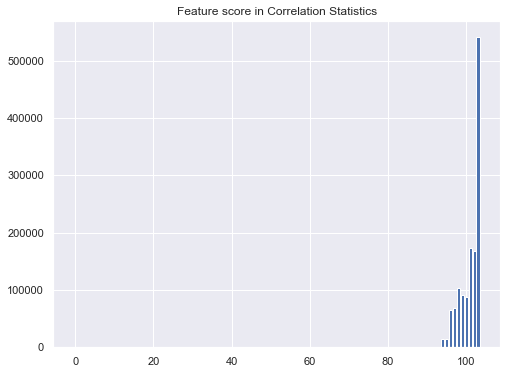

In [ ]:
# what are scores for the features
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(8,6))
plt.title("Feature score in Correlation Statistics")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

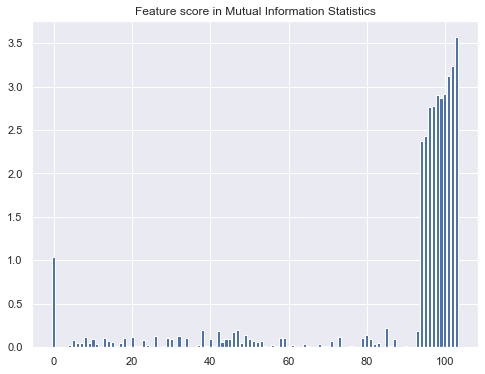

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Feature score in Mutual Information Statistics")
plt.bar([i for i in range(len(mfs.scores_))], mfs.scores_)
plt.show()

In [ ]:
# Feature selected data

X_train_fs  = pd.DataFrame(X_train_fs).iloc[:,-5:]
X_test_fs  = pd.DataFrame(X_test_fs).iloc[:,-5:]

X_train_mfs  = pd.DataFrame(X_train_mfs).iloc[:,-20:]
X_test_mfs  = pd.DataFrame(X_test_mfs).iloc[:,-20:]

In [ ]:
hist_op, mod_op, time_op = make_model(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 6s 87ms/step - loss: 1497540480.0000 - mae: 24112.8867 - val_loss: 705025664.0000 - val_mae: 19824.6973
Epoch 2/10
67/67 [==============================] - 6s 84ms/step - loss: 305200736.0000 - mae: 12378.5381 - val_loss: 472673920.0000 - val_mae: 15508.7246
Epoch 3/10
67/67 [==============================] - 6s 88ms/step - loss: 245863648.0000 - mae: 10903.4434 - val_loss: 331050048.0000 - val_mae: 10562.6211
Epoch 4/10
67/67 [==============================] - 6s 88ms/step - loss: 188650592.0000 - mae: 9639.4102 - val_loss: 1359817984.0000 - val_mae: 27567.0605
Epoch 5/10
67/67 [==============================] - 6s 83ms/step - loss: 213132016.0000 - mae: 9724.1650 - val_loss: 227981584.0000 - val_mae: 9894.4561
Epoch 6/10
67/67 [==============================] - 6s 83ms/step - loss: 141803856.0000 - mae: 8301.6738 - val_loss: 259012864.0000 - val_mae: 9351.8320
Epoch 7/10
67/67 [==============================] - 6s 91ms/step - loss: 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3324)              349020    
_________________________________________________________________
dense_1 (Dense)              (None, 831)               2763075   
_________________________________________________________________
dense_2 (Dense)              (None, 2216)              1843712   
_________________________________________________________________
dense_3 (Dense)              (None, 831)               1842327   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 832       
Total params: 6,798,966
Trainable params: 6,798,966
Non-trainable params: 0
_________________________________________________________________


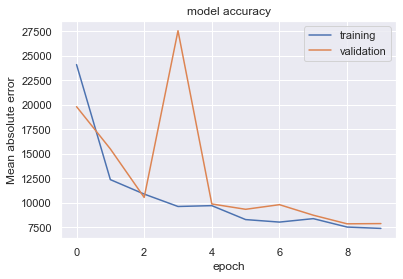

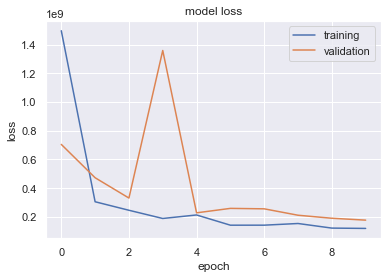

Test loss: 1.86e+08
Test accuracy: 7.52e+03
Time for training the model: 60.35797333717346 sec


In [ ]:
mod_op.summary()
plot_training_history(hist_op, mod_op, X_test_s)
print('Time for training the model:',time_op,'sec')

In [ ]:
hist_op_2, mod_op_2, time_op_2 = make_model2(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 1s 8ms/step - loss: 8929300480.0000 - mae: 74758.8828 - val_loss: 8780225536.0000 - val_mae: 74705.1797
Epoch 2/10
67/67 [==============================] - 0s 7ms/step - loss: 8845948928.0000 - mae: 74357.4141 - val_loss: 8665563136.0000 - val_mae: 74148.9062
Epoch 3/10
67/67 [==============================] - 0s 7ms/step - loss: 8693939200.0000 - mae: 73625.3281 - val_loss: 8493298176.0000 - val_mae: 73306.5859
Epoch 4/10
67/67 [==============================] - 0s 7ms/step - loss: 8482543104.0000 - mae: 72607.6875 - val_loss: 8263748608.0000 - val_mae: 72170.4844
Epoch 5/10
67/67 [==============================] - 0s 7ms/step - loss: 8230422528.0000 - mae: 71321.0547 - val_loss: 7994628096.0000 - val_mae: 70807.4609
Epoch 6/10
67/67 [==============================] - 0s 7ms/step - loss: 7912388608.0000 - mae: 69721.1406 - val_loss: 7669321728.0000 - val_mae: 69127.5859
Epoch 7/10
67/67 [==============================] - 0s 7ms/step 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3324)              349020    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3325      
Total params: 352,345
Trainable params: 352,345
Non-trainable params: 0
_________________________________________________________________


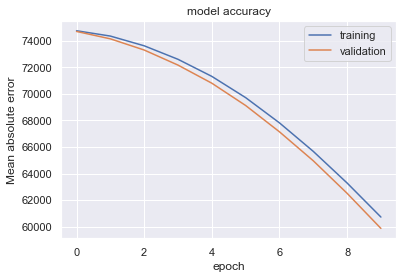

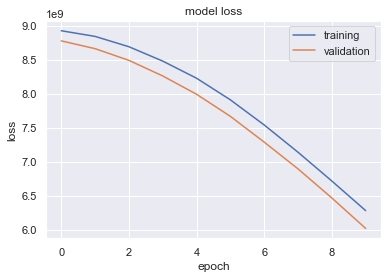

Test loss: 5.78e+09
Test accuracy: 5.68e+04
Time for training the model: 5.186263799667358 sec


In [ ]:
mod_op_2.summary()
plot_training_history(hist_op_2, mod_op_2, X_test_s)
print('Time for training the model:',time_op_2,'sec')

In [ ]:
hist_op_3, mod_op_3, time_op_3 = make_model3(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 1s 21ms/step - loss: 8948232192.0000 - mae: 74851.0625 - val_loss: 8827920384.0000 - val_mae: 74940.2344
Epoch 2/10
67/67 [==============================] - 1s 19ms/step - loss: 8948232192.0000 - mae: 74851.0781 - val_loss: 8827920384.0000 - val_mae: 74940.2344
Epoch 3/10
67/67 [==============================] - 1s 19ms/step - loss: 8948232192.0000 - mae: 74851.0703 - val_loss: 8827920384.0000 - val_mae: 74940.2344
Epoch 4/10
67/67 [==============================] - 1s 19ms/step - loss: 8948230144.0000 - mae: 74851.0625 - val_loss: 8827920384.0000 - val_mae: 74940.2344
Epoch 5/10
67/67 [==============================] - 1s 19ms/step - loss: 8948230144.0000 - mae: 74851.0781 - val_loss: 8827920384.0000 - val_mae: 74940.2344
Epoch 6/10
67/67 [==============================] - 1s 20ms/step - loss: 8948231168.0000 - mae: 74851.0703 - val_loss: 8827920384.0000 - val_mae: 74940.2344
Epoch 7/10
67/67 [==============================] - 1s 20m

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3324)              349020    
_________________________________________________________________
dense_8 (Dense)              (None, 416)               1383200   
_________________________________________________________________
dense_9 (Dense)              (None, 416)               173472    
_________________________________________________________________
dense_10 (Dense)             (None, 416)               173472    
_________________________________________________________________
dense_11 (Dense)             (None, 416)               173472    
_________________________________________________________________
dense_12 (Dense)             (None, 416)               173472    
_________________________________________________________________
dense_13 (Dense)             (None, 416)              

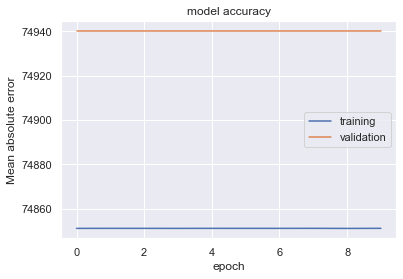

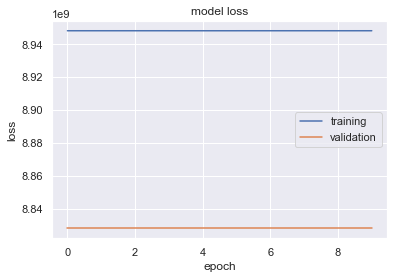

Test loss: 8.61e+09
Test accuracy: 7.23e+04
Time for training the model: 13.892483711242676 sec


In [ ]:
mod_op_3.summary()
plot_training_history(hist_op_3, mod_op_3, X_test_s)
print('Time for training the model:',time_op_3,'sec')

In [ ]:
rmf_op = rfr(X_train, Y_train)
rmf_op_fs = rfr(X_train_fs, Y_train)
rmf_op_mfs = rfr(X_train_mfs, Y_train)

## Results for Open Land:

In [ ]:
## Predictions:

rp_1 = rmf_op.predict(X_test)
rp_2 = rmf_op_fs.predict(X_test_fs)
rp_3 = rmf_op_mfs.predict(X_test_mfs)
dl_1 = mod_op.predict(X_test_s)
dl_2 = mod_op_2.predict(X_test_s)
dl_3 = mod_op_3.predict(X_test_s)

In [ ]:
# Printing Accuracy Matrices for random forest models:

print(['MAE', 'RMS', "VS", "R2"])
print("For all the data with Random forest")
print(accmat(Y_test, rp_1))
print("For the data with Correlation Statistics selection and Random forest")
print(accmat(Y_test, rp_2))
print("For the data with Mutual Information Statistics and Random forest")
print(accmat(Y_test, rp_3))
print("For the data with Hidden layer")
print(accmat(Y_test, dl_1))
print("For the data with No Hidden layer")
print(accmat(Y_test, dl_2))
print("For the data with more Hidden layer")
print(accmat(Y_test, dl_3))

['MAE', 'RMS', 'VS', 'R2']
For all the data with Random forest
[1615.183304691774, 7701054.029052274, 0.9977198356032208, 0.9977197993650465]
For the data with Correlation Statistics selection and Random forest
[1392.3508710360472, 7024570.110986725, 0.9979209072889902, 0.9979200990972247]
For the data with Mutual Information Statistics and Random forest
[1455.2000242023257, 7127330.748221567, 0.997890042967977, 0.9978896727595589]
For the data with Hidden layer
[7522.676081641674, 186337223.62499475, 0.9476701020953031, 0.9448275191912314]
For the data with No Hidden layer
[56807.890390197885, 5783434075.609797, 0.23441708714633924, -0.7124136516465636]
For the data with more Hidden layer
[72306.712555194, 8605618756.404331, 0.0, -1.5480326820840813]


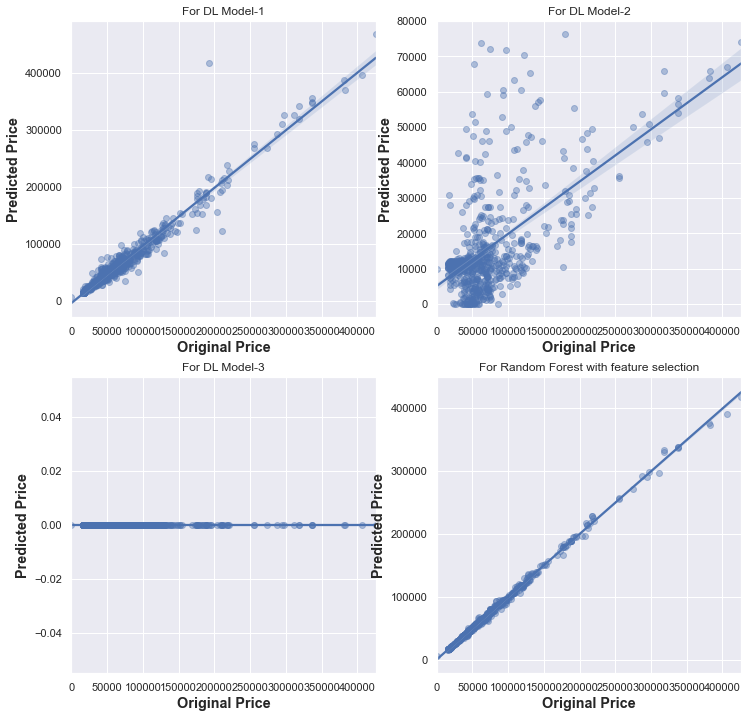

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

#ax.figure.set_size_inches(10, 10)
sns.set(rc={'figure.figsize':(12,12)})

plt.subplot(221)
plt.title('For DL Model-1')
ax = sns.regplot(Y_test, dl_1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(222)
plt.title('For DL Model-2')
ax = sns.regplot(Y_test, dl_2, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(223)
plt.title('For DL Model-3')
ax = sns.regplot(Y_test, dl_3, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(224)
plt.title('For Random Forest with feature selection')
ax = sns.regplot(Y_test, rp_1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)

plt.show()

# Execution for Commerc_01 land:

In [ ]:
data = P_t_p[3][1]

In [ ]:
data.head()

,TARGET_FID,FacilityID,Count_Airport,Count_AmusementPark,Count_Aquarium,Count_ArtGallery,Count_ATM,Count_AutoTaxiStand,Count_Bakery,Count_Bank,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,8000.0,0,0,0,0,0,0,0,0,...,44850.0,134250.000000,136500.000000,139025.0,141550.000000,173350.000000,190650.0,200200.000000,235100.000000,242900.0
1,1,8001.0,0,0,0,0,0,0,0,0,...,30350.0,37350.000000,37350.000000,42825.0,48300.000000,53100.000000,58400.0,65500.000000,78600.000000,81550.0
2,2,8002.0,0,0,0,0,0,0,0,0,...,36900.0,58800.000000,58800.000000,73050.0,87300.000000,104800.000000,131000.0,144100.000000,172900.000000,178600.0
3,3,8003.0,0,0,0,0,1,0,1,1,...,46340.0,77620.000000,77620.000000,98260.0,118900.000000,145400.000000,174660.0,206560.000000,236760.000000,238580.0
4,4,8004.0,0,0,1,0,1,0,2,0,...,50600.0,85933.333333,85933.333333,104800.0,123666.666667,152033.333333,180400.0,198766.666667,218666.666667,231000.0


In [ ]:
X = data.drop(['2016','FacilityID'], axis = 1)
Y = data['2016']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# All data:

X_train_s, X_test_s = standata(X_train, X_test)
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
X_train_mfs, X_test_mfs, mfs = select_features_mir(X_train, Y_train, X_test)

 Seeing Selection data:

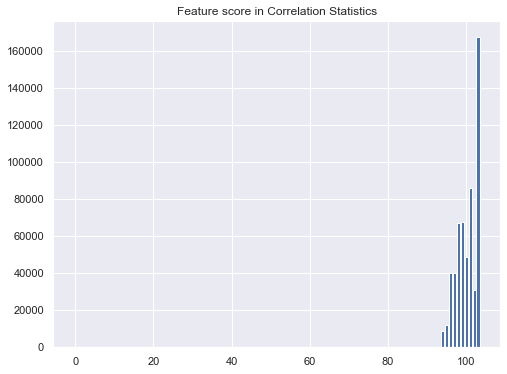

In [ ]:
# what are scores for the features
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(8,6))
plt.title("Feature score in Correlation Statistics")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

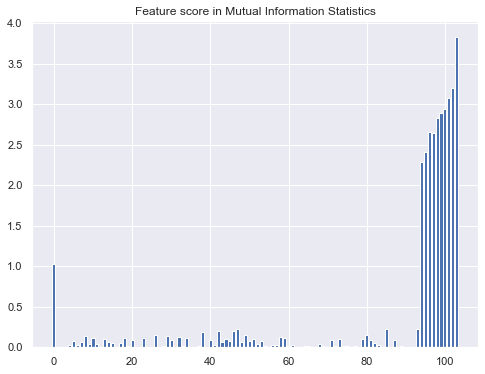

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Feature score in Mutual Information Statistics")
plt.bar([i for i in range(len(mfs.scores_))], mfs.scores_)
plt.show()

In [ ]:
# Feature selected data

X_train_fs = pd.DataFrame(X_train_fs).iloc[:,-5:]
X_test_fs  = pd.DataFrame(X_test_fs).iloc[:,-5:]

X_train_mfs = pd.DataFrame(X_train_mfs).iloc[:,-10:]
X_test_mfs  = pd.DataFrame(X_test_mfs).iloc[:,-10:]

In [ ]:
hist_op, mod_op, time_op = make_model(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 6s 95ms/step - loss: 13490131968.0000 - mae: 78421.3750 - val_loss: 3304734208.0000 - val_mae: 40127.9961
Epoch 2/10
67/67 [==============================] - 6s 86ms/step - loss: 2868622336.0000 - mae: 38197.5195 - val_loss: 3066202880.0000 - val_mae: 36955.9492
Epoch 3/10
67/67 [==============================] - 6s 83ms/step - loss: 1866594688.0000 - mae: 30527.7773 - val_loss: 3377518080.0000 - val_mae: 39596.7500
Epoch 4/10
67/67 [==============================] - 6s 83ms/step - loss: 1717064064.0000 - mae: 28531.6934 - val_loss: 2400995584.0000 - val_mae: 28869.7539
Epoch 5/10
67/67 [==============================] - 6s 85ms/step - loss: 1455098880.0000 - mae: 26448.9844 - val_loss: 2349529600.0000 - val_mae: 30587.4082
Epoch 6/10
67/67 [==============================] - 6s 93ms/step - loss: 1497271936.0000 - mae: 24903.7129 - val_loss: 1972525184.0000 - val_mae: 27522.8613
Epoch 7/10
67/67 [==============================] - 7s 10

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 3324)              349020    
_________________________________________________________________
dense_20 (Dense)             (None, 831)               2763075   
_________________________________________________________________
dense_21 (Dense)             (None, 2216)              1843712   
_________________________________________________________________
dense_22 (Dense)             (None, 831)               1842327   
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 832       
Total params: 6,798,966
Trainable params: 6,798,966
Non-trainable params: 0
_________________________________________________________________


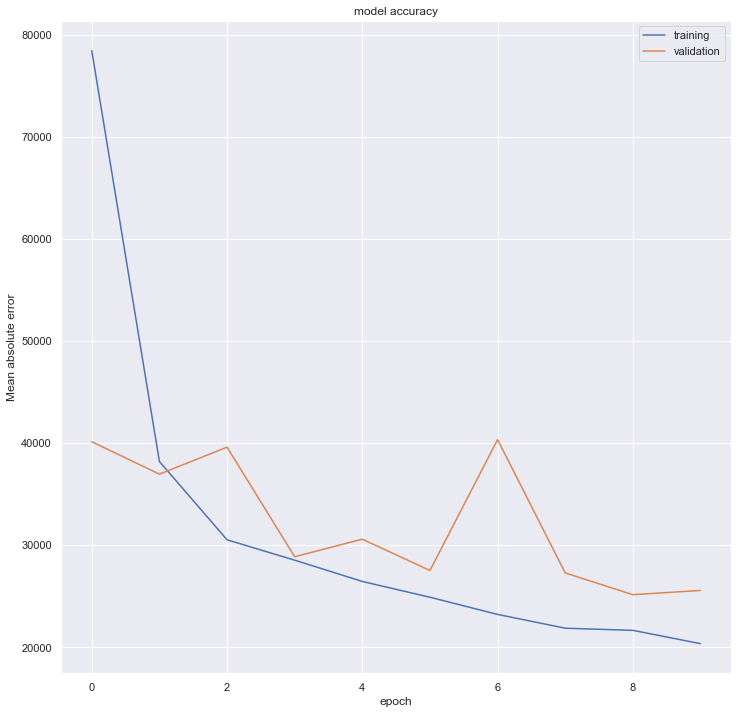

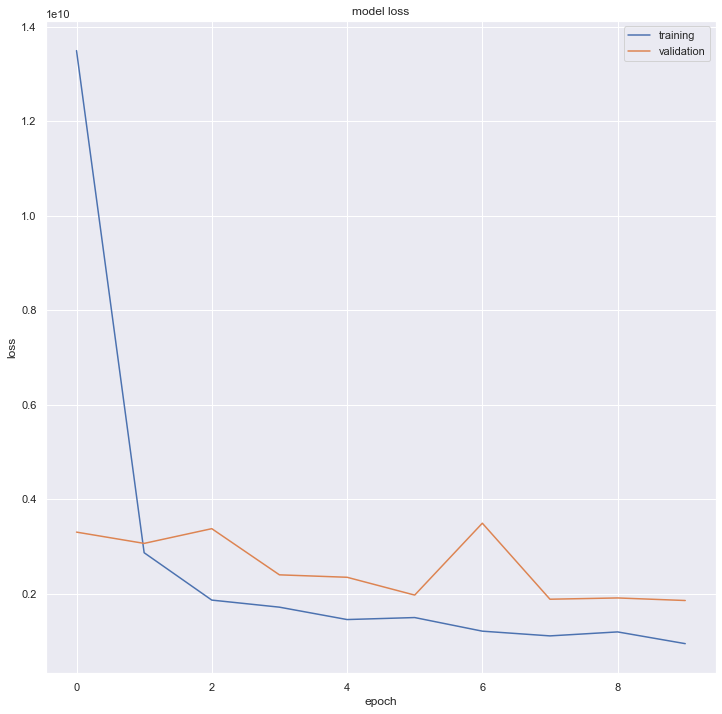

Test loss: 4.26e+09
Test accuracy: 2.91e+04
Time for training the model: 61.309773683547974 sec


In [ ]:
mod_op.summary()
plot_training_history(hist_op, mod_op, X_test_s)
print('Time for training the model:',time_op,'sec')

In [ ]:
hist_op_2, mod_op_2, time_op_2 = make_model2(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 1s 8ms/step - loss: 68650135552.0000 - mae: 218110.4219 - val_loss: 69850177536.0000 - val_mae: 217295.0469
Epoch 2/10
67/67 [==============================] - 0s 7ms/step - loss: 68410916864.0000 - mae: 217692.6562 - val_loss: 69514403840.0000 - val_mae: 216712.8125
Epoch 3/10
67/67 [==============================] - 0s 7ms/step - loss: 67988701184.0000 - mae: 216950.1562 - val_loss: 68994727936.0000 - val_mae: 215805.1875
Epoch 4/10
67/67 [==============================] - 0s 7ms/step - loss: 67380375552.0000 - mae: 215894.0938 - val_loss: 68311068672.0000 - val_mae: 214613.4844
Epoch 5/10
67/67 [==============================] - 0s 7ms/step - loss: 66599354368.0000 - mae: 214528.0469 - val_loss: 67462361088.0000 - val_mae: 213108.4844
Epoch 6/10
67/67 [==============================] - 0s 7ms/step - loss: 65678983168.0000 - mae: 212878.2812 - val_loss: 66449965056.0000 - val_mae: 211293.2031
Epoch 7/10
67/67 [======================

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 3324)              349020    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 3325      
Total params: 352,345
Trainable params: 352,345
Non-trainable params: 0
_________________________________________________________________


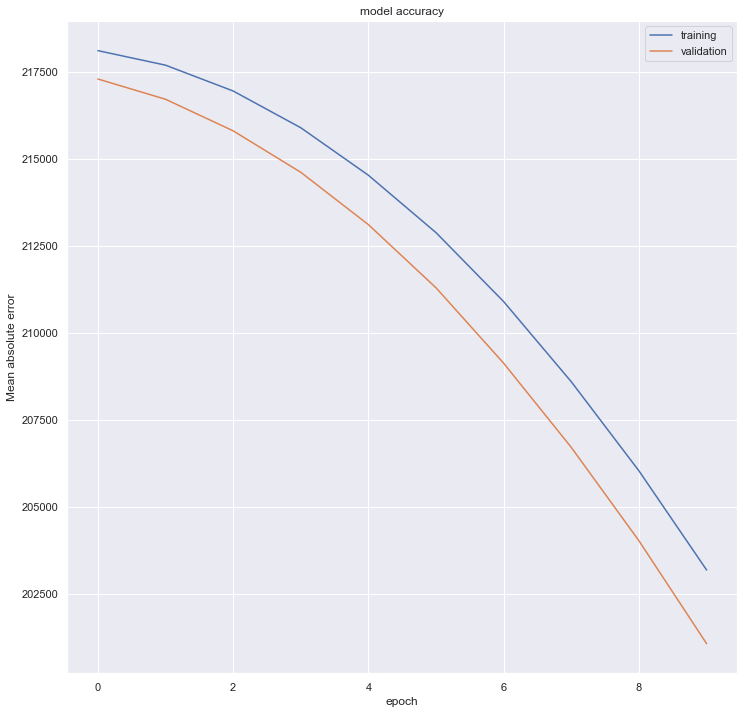

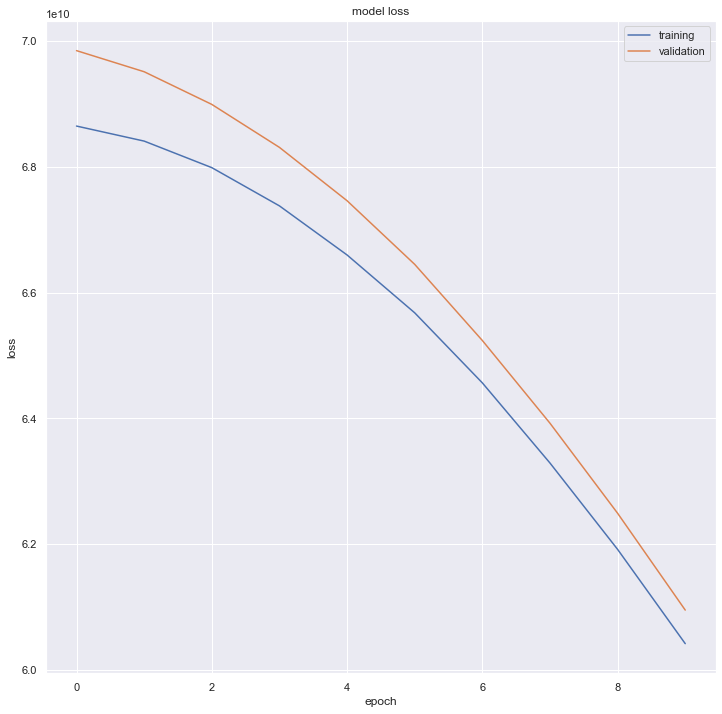

Test loss: 5.99e+10
Test accuracy: 2.02e+05
Time for training the model: 5.17387318611145 sec


In [ ]:
mod_op_2.summary()
plot_training_history(hist_op_2, mod_op_2, X_test_s)
print('Time for training the model:',time_op_2,'sec')

In [ ]:
hist_op_3, mod_op_3, time_op_3 = make_model3(X_train_s, Y_train)

Epoch 1/10
67/67 [==============================] - 1s 22ms/step - loss: 17047998464.0000 - mae: 83839.1094 - val_loss: 3324783104.0000 - val_mae: 37236.4805
Epoch 2/10
67/67 [==============================] - 1s 21ms/step - loss: 5092143616.0000 - mae: 50322.9141 - val_loss: 3263628544.0000 - val_mae: 35917.1250
Epoch 3/10
67/67 [==============================] - 1s 20ms/step - loss: 1981903616.0000 - mae: 31362.0117 - val_loss: 2278484736.0000 - val_mae: 29743.0938
Epoch 4/10
67/67 [==============================] - 1s 21ms/step - loss: 1450572544.0000 - mae: 27216.7852 - val_loss: 2348391168.0000 - val_mae: 29247.2090
Epoch 5/10
67/67 [==============================] - 1s 20ms/step - loss: 1348705792.0000 - mae: 25801.1543 - val_loss: 1964762112.0000 - val_mae: 26713.9395
Epoch 6/10
67/67 [==============================] - 2s 23ms/step - loss: 1176317824.0000 - mae: 24318.4766 - val_loss: 3659537152.0000 - val_mae: 37440.7305
Epoch 7/10
67/67 [==============================] - 1s 22

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 3324)              349020    
_________________________________________________________________
dense_27 (Dense)             (None, 416)               1383200   
_________________________________________________________________
dense_28 (Dense)             (None, 416)               173472    
_________________________________________________________________
dense_29 (Dense)             (None, 416)               173472    
_________________________________________________________________
dense_30 (Dense)             (None, 416)               173472    
_________________________________________________________________
dense_31 (Dense)             (None, 416)               173472    
_________________________________________________________________
dense_32 (Dense)             (None, 416)              

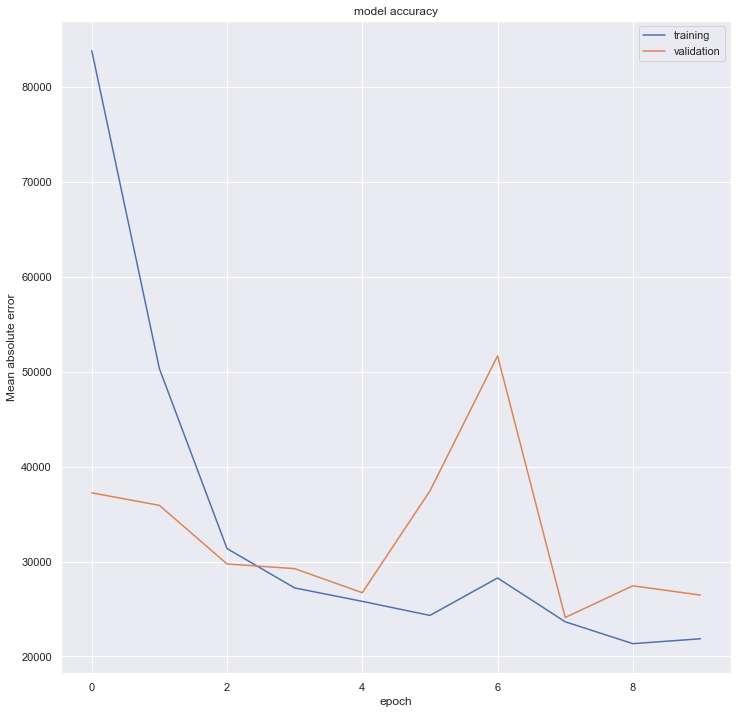

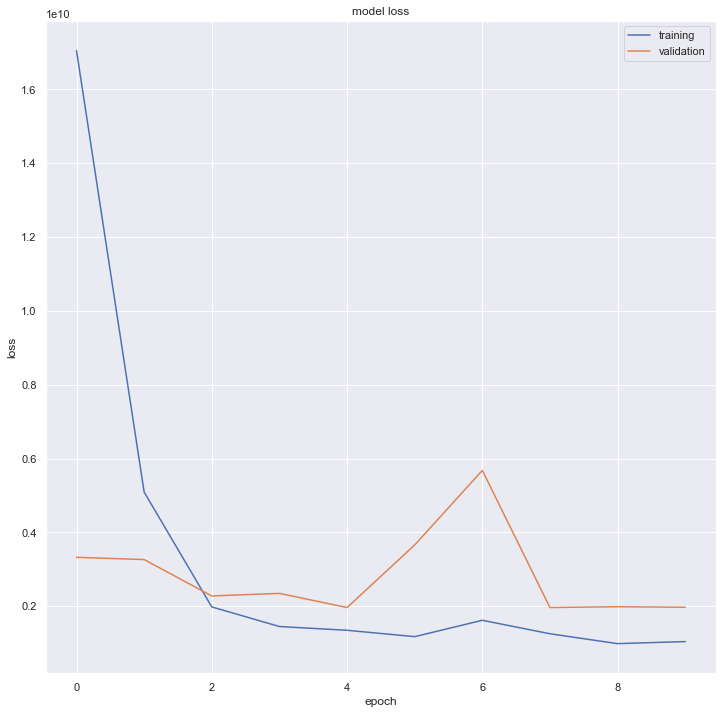

Test loss: 3.86e+09
Test accuracy: 2.99e+04
Time for training the model: 15.122111558914185 sec


In [ ]:
mod_op_3.summary()
plot_training_history(hist_op_3, mod_op_3, X_test_s)
print('Time for training the model:',time_op_3,'sec')

In [ ]:
rmf_op = rfr(X_train, Y_train)
rmf_op_fs = rfr(X_train_fs, Y_train)
rmf_op_mfs = rfr(X_train_mfs, Y_train)

## Results for Commerc_01 Land:

In [ ]:
## Predictions:

rp_1 = rmf_op.predict(X_test)
rp_2 = rmf_op_fs.predict(X_test_fs)
rp_3 = rmf_op_mfs.predict(X_test_mfs)
dl_1 = mod_op.predict(X_test_s)
dl_2 = mod_op_2.predict(X_test_s)
dl_3 = mod_op_3.predict(X_test_s)

In [ ]:
# Printing Accuracy Matrices for random forest models:

print(['MAE', 'RMS', "VS", "R2"])
print("For all the data with Random forest")
print(accmat(Y_test, rp_1))
print("For the data with Correlation Statistics selection and Random forest")
print(accmat(Y_test, rp_2))
print("For the data with Mutual Information Statistics and Random forest")
print(accmat(Y_test, rp_3))
print("For the data with Hidden layer")
print(accmat(Y_test, dl_1))
print("For the data with No Hidden layer")
print(accmat(Y_test, dl_2))
print("For the data with more Hidden layer")
print(accmat(Y_test, dl_3))

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

#ax.figure.set_size_inches(10, 10)
sns.set(rc={'figure.figsize':(12,12)})

plt.subplot(221)
plt.title('For DL Model-1')
ax = sns.regplot(Y_test, dl_1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(222)
plt.title('For DL Model-2')
ax = sns.regplot(Y_test, dl_2, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(223)
plt.title('For DL Model-3')
ax = sns.regplot(Y_test, dl_3, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)


plt.subplot(224)
plt.title('For Random Forest with feature selection')
ax = sns.regplot(Y_test, rp_1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Original Price', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(10, 10)

plt.show()